In [3]:
from os import listdir
import random
import numpy as np
import seaborn
from scipy import stats
from matplotlib import image
import matplotlib.pyplot as plt

In [4]:
path = '/users/user/downloads/mirflickr/'
quantity = 250
random = 4 

RGB = {
    'red': 0,
    'green': 1,
    'blue': 2
}

matspodivannia = {
    'red': 0,
    'green': 0,
    'blue': 0  
}

dispersion = {
    'red': 0,
    'green': 0,
    'blue': 0  
}

asymmetries = {
    'red': 0,
    'green': 0,
    'blue': 0  
}

excesses = {
    'red': 0,
    'green': 0,
    'blue': 0  
}

1. Сформувати тестову вибірку зображень з вихідного пакета;

In [5]:
def get_test_sample(path, quantity, random):
    
    np.random.RandomState(random)
    ind = np.random.choice(range(25000), quantity)
    sample = list()
    for i in range(quantity):
        file = 'im' + str(ind[i]) + '.jpg'
        sample.append(image.imread(path + file))
    val = np.zeros((3, 256))
    for img in sample:
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                val[0][img[i][j][0]] += 1
                val[1][img[i][j][1]] += 1
                val[2][img[i][j][2]] += 1
    print('The sample is formed!')   
    
    return val, sample

In [6]:
val, sample = get_test_sample(path, quantity, random)

The sample is formed!


2. Для кожного каналу кольору кожного зображення з тестового пакета обчислити наступні характеристики: a. Математичне сподівання і дисперсію; b. Коефіцієнти асиметрії та ексцесу (нормалізований);

In [7]:
def get_matspod_and_disp(val, RGB, kanal):
    
    print(kanal)
    sum_val = sum(val[RGB[kanal]])
    matspod = 0
    for ind in range(len(val[RGB[kanal]])):
        k = (val[RGB[kanal]][ind] / sum_val)
        matspod += k * ind
    disp = 0
    for ind in range(len(val[RGB[kanal]])):
        k = (val[RGB[kanal]][ind] / sum_val)
        disp += k * ((ind - matspod) ** 2)        
    matspodivannia[kanal] = matspod
    dispersion[kanal] = disp
    print(f'Matematuchne spodivannia {matspod}')
    print(f'Dispersia {disp}\n')   
    
def fi(m, matspod, p):
    
    sum_val = sum(m)
    f = 0
    for ind in range(len(m)):
        k = (m[ind] / sum_val)
        f += k * ((ind - matspod) ** p)
    return f

def get_asymm_excess(val, RGB, kanal):
    
    print(kanal)
    asymm = fi(val[RGB[kanal]], matspodivannia[kanal], 3) / (dispersion[kanal] ** (3 / 2))
    excess = fi(val[RGB[kanal]], matspodivannia[kanal], 4) / (dispersion[kanal] ** 2) - 3
    asymmetries[kanal] = asymm
    excesses[kanal] = excess
    print(f'Asymmetry {asymm}')
    print(f'Excess {excess}\n')

In [8]:
red_matspod_disp = get_matspod_and_disp(val, RGB, 'red')
green_matspod_disp = get_matspod_and_disp(val, RGB, 'green')
blue_matspod_disp = get_matspod_and_disp(val, RGB, 'blue')

red
Matematuchne spodivannia 115.07050075657062
Dispersia 6239.145360537583

green
Matematuchne spodivannia 106.90361208116828
Dispersia 5658.206235152412

blue
Matematuchne spodivannia 99.34551353618006
Dispersia 6078.493979325842



In [9]:
red_asymm_excess = get_asymm_excess(val, RGB, 'red')
green_asymm_excess = get_asymm_excess(val, RGB, 'green')
blue_asymm_excess = get_asymm_excess(val, RGB, 'blue')

red
Asymmetry 0.17200205132957633
Excess -1.1999833213649318

green
Asymmetry 0.3091704854987942
Excess -1.0475381779994972

blue
Asymmetry 0.43800578130010975
Excess -1.039857267449018



3. Побудувати вектори параметрів зображень, що складаються з: a. Математичних очікувань значень яскравості для кожного каналу кольору; b. Математичних очікувань і дисперсії значень яскравості для кожного каналу кольору; c. Математичних очікувань, дисперсії і коефіцієнта асиметрії значень яскравості для кожного каналу кольору; d. Математичних очікувань, дисперсії, коефіцієнтів асиметрії та ексцесу значень яскравості для кожного каналу кольору;

In [13]:
def get_vector(kanal):
    vector = np.array([matspodivannia[kanal], dispersion[kanal], asymmetries[kanal], excesses[kanal]])     
    return vector

def get_all_vectors(vector, kanal):
    for img in sample:
        img = np.reshape(img, (-1, 3))
        img = np.swapaxes(img, 0, 1)
        vector = np.concatenate((np.copy(vector),img),axis=1)
    x = np.random.normal(matspodivannia[kanal], dispersion[kanal], 1)
    print(kanal + '\n')
    print('Matematuchne spodivannia\n' + str(x))
    print('Matematuchne spodivannia + dispersia\n' + str(np.cov(vector)[:2, :2]))
    print('Matematuchne spodivannia + dispersia + asymmetry\n' + str(np.cov(vector)[:3, :3]))
    print('Matematuchne spodivannia + dispersia + asymmetry + excess\n' + str(np.cov(vector)[:4, :4]) + '\n')

In [14]:
vector = np.array([get_vector('red'), get_vector('green'), get_vector('blue')])
red_vectors = get_all_vectors(vector, 'red')
green_vectors = get_all_vectors(vector, 'green')
blue_vectors = get_all_vectors(vector, 'blue')

red

Matematuchne spodivannia
[3103.64015788]
Matematuchne spodivannia + dispersia
[[6239.97763909 5110.67693039]
 [5110.67693039 5658.89009955]]
Matematuchne spodivannia + dispersia + asymmetry
[[6239.97763909 5110.67693039 4341.68392504]
 [5110.67693039 5658.89009955 5226.26531538]
 [4341.68392504 5226.26531538 6079.28719898]]
Matematuchne spodivannia + dispersia + asymmetry + excess
[[6239.97763909 5110.67693039 4341.68392504]
 [5110.67693039 5658.89009955 5226.26531538]
 [4341.68392504 5226.26531538 6079.28719898]]

green

Matematuchne spodivannia
[-8690.28703728]
Matematuchne spodivannia + dispersia
[[6239.97763909 5110.67693039]
 [5110.67693039 5658.89009955]]
Matematuchne spodivannia + dispersia + asymmetry
[[6239.97763909 5110.67693039 4341.68392504]
 [5110.67693039 5658.89009955 5226.26531538]
 [4341.68392504 5226.26531538 6079.28719898]]
Matematuchne spodivannia + dispersia + asymmetry + excess
[[6239.97763909 5110.67693039 4341.68392504]
 [5110.67693039 5658.89009955 5226.26

4. Побудувати гаусові моделі зображень з використанням розрахованих раніше параметрів.

5. Провести декомпозицію кожного каналу кольору кожного зображення з застосуванням методу головних компонент (PCA): a. Варіюючи кількість компонент, провести реконструкцію окремих каналів кольору зображень (від компонент з найбільшою енергією поступово переходячи до компонентів з мінімальною енергією). b. Побудувати залежність помилки відновлення (середнє відхилення вихідного зображення відреконструйованого, MSE) від кількості використаних компонент.

In [ ]:
def get_pca(img_2d, nmpc):
    cov_mat = img_2d - np.mean(img_2d)
    value, vec = np.linalg.eigh(np.cov(cov_mat))
    p = np.size(vec, axis =1)
    ind = np.argsort(value)
    ind = ind[::-1]
    vec = vec[:, ind]
    value = value[ind]
    
    if (nmpc <p) or (nmpc >0):
       vec = vec[:, range(nmpc)]
    
    score = np.dot(vec.T, cov_mat)
    rcn = np.dot(vec, score) + np.mean(img_2d).T
    rcn_img_mat = np.uint8(np.absolute(rcn))
    return rcn_img_mat

def show_pca():
    test = np.array(sample[3])
    red = test[:,:,0]
    green = test[:,:,1]
    blue = test[:,:,2]
    numbers = [3, 30,90]
    fig = plt.figure(figsize=(20,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(sample[3])
    m = 2
    for num in numbers:
       red_rcn, green_rcn, blue_rcn = get_pca(red, num), get_pca(green, num), get_pca(blue, num)
       test_rcn = np.dstack((red_rcn, green_rcn, blue_rcn))
       fig.add_subplot(3, 2, m)
       plt.imshow(test_rcn)
       m += 2

def my_mse(first_img, second_img):
    err = np.sum((first_img.astype("float") - second_img.astype("float")) ** 2)
    err /= float(first_img.shape[0] * first_img.shape[1])
    
    return err

def show

In [95]:
def get_pca(img_2d, nmpc):
    cov_mat = img_2d - np.mean(img_2d)
    value, vec = np.linalg.eigh(np.cov(cov_mat))
    p = np.size(vec, axis =1)
    ind = np.argsort(value)
    ind = ind[::-1]
    vec = vec[:, ind]
    value = value[ind]
    if (nmpc <p) or (nmpc >0):
       vec = vec[:, range(nmpc)]   
    score = np.dot(vec.T, cov_mat)
    rcn = np.dot(vec, score) + np.mean(img_2d).T
    rcn_img_mat = np.uint8(np.absolute(rcn))
    return rcn_img_mat

def show_pca():
    test = np.array(sample[4])
    red = test[:,:,0]
    green = test[:,:,1]
    blue = test[:,:,2]
    numbers = [3, 30,90]
    fig = plt.figure(figsize=(20,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(sample[4])
    m = 2
    for num in numbers:
       red_rcn, green_rcn, blue_rcn = get_pca(red, num), get_pca(green, num), get_pca(blue, num)
       test_rcn = np.dstack((red_rcn, green_rcn, blue_rcn))
       fig.add_subplot(3, 2, m)
       plt.imshow(test_rcn)
       m += 2

def get_mse(img1, img2):
    e = np.sum((img1.astype("float") - img2.astype("float")) ** 2)
    e /= float(img1.shape[0] * img1.shape[1])
    
    return e

def show_mse():
    test = np.array(sample[4])
    red = test[:,:,0]
    green = test[:,:,1]
    blue = test[:,:,2]
    mse = list()
    for i in range(100):
        red_rcn, green_rcn, blue_rcn = get_pca(red, i), get_pca(green, i), get_pca(blue, i)
        rcn_img = np.dstack((red_rcn, green_rcn, blue_rcn))
        mse.append(get_mse(sample[4], rcn_img))  
    plt.plot(range(len(mse)), mse)
    plt.xlabel('components')
    plt.ylabel('MSE')
    plt.show()

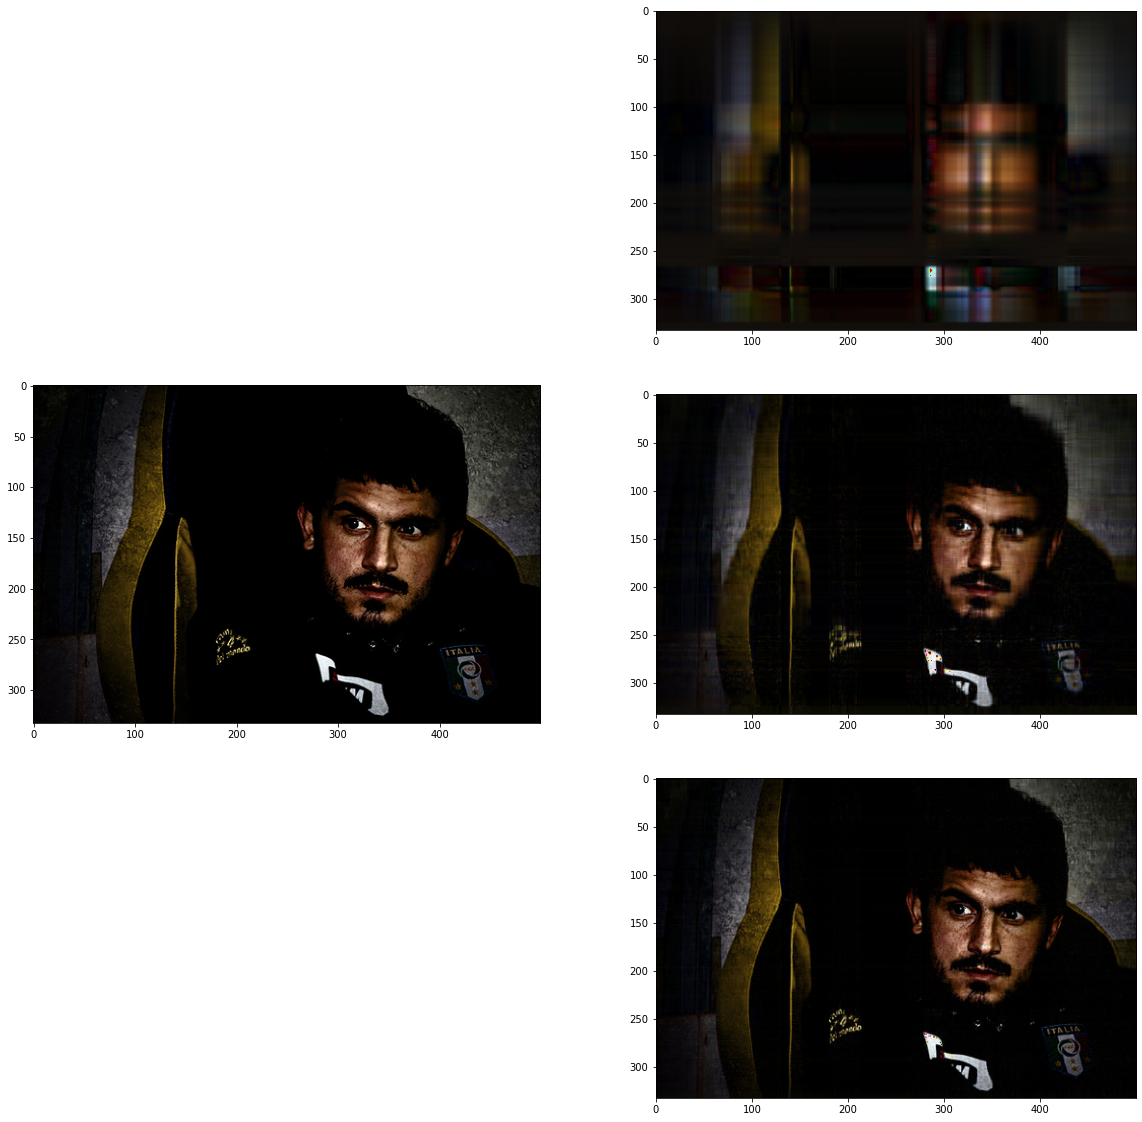

In [70]:
show_pca()

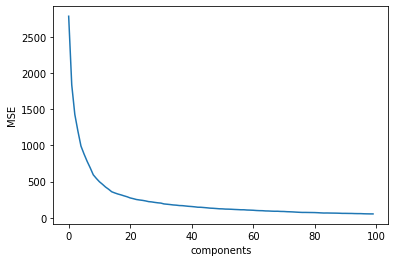

In [96]:
show_mse()

Провести моделювання окремих каналів кольору зображень з використанням марковських ланцюгів: a. Для кожного каналу кольору кожного зображення розрахувати стохастическую матрицю марковської ланцюга першого і другого порядків (обробка пікселів по горизонталі справа наліво і навпаки, а також по вертикалі зверху вниз і навпаки). У звіті привести явний вигляд однієї марковської ланцюга для одного з каналів кольору тестового зображення; b. Перевірити властивість регулярності, реккурентное і незворотності (irreducible) для отриманих марковских моделей для 5 ітерацій.

In [104]:
def markov_matrix():
    test = np.array(sample[4])
    red = test[:,:,0]
    green = test[:,:,1]
    blue = test[:,:,2]
    kanals_list = [red, green, blue]
    kanals = ['red', 'green', 'blue']
    k = 0
    for kanal in kanals_list:
        matrix1 = np.zeros(shape=(256, 256))
        massif = kanal.flatten('F')
        prev_color = massif[0]
        for i in range(len(massif) - 1):
            matrix1[massif[i]][massif[i + 1]] += 1
        matrix = matrix1[0] / sum(matrix1[0])
        for i in range(1, 256):
            matrix = np.vstack((matrix, matrix1[i] / sum(matrix1[i])))    
        print(f'matrix {kanals[k]} 1st\n', matrix)
        print(f'\nmatrix for {kanals[k]} 2d\n', np.linalg.matrix_power(matrix, 2))
        k +=1

In [105]:
markov_matrix()

matrix red 1st
 [[0.94040068 0.03075755 0.00978915 ... 0.         0.         0.        ]
 [0.36006031 0.359375   0.12870066 ... 0.         0.         0.        ]
 [0.21575758 0.20848485 0.23587879 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.25       0.25      ]
 [0.         0.         0.         ... 0.         0.         0.125     ]
 [0.         0.         0.         ... 0.         0.08333333 0.16666667]]

matrix for red 2d
 [[8.98927835e-01 4.31612271e-02 1.69429376e-02 ... 1.63760196e-07
  2.20061340e-07 0.00000000e+00]
 [5.09664058e-01 1.78654789e-01 9.51554689e-02 ... 0.00000000e+00
  1.72269168e-06 9.01719760e-07]
 [3.63304354e-01 1.59617210e-01 1.22394568e-01 ... 0.00000000e+00
  4.32900433e-06 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.75000000e-02 8.95833333e-02]
 [5.88235294e-04 2.94117647e-04 2.94117647e-04 ... 0.00000000e+00
  1.04166667e-02 3.33333333e-02]
 [0.00000000e+00 0.0